In [1]:
library(cpop)
library(dplyr)
library(magrittr)
library(ggplot2)
library(gridExtra)
library(functional)
library(tidyr)

Loading required package: crops

Registered S3 method overwritten by 'ggplot2':
  method        from
  print.element sets

Loading required package: pacman


Attaching package: ‘cpop’


The following objects are masked from ‘package:stats’:

    fitted, simulate


The following object is masked from ‘package:methods’:

    show



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract




In [2]:
help(wavenumber_spectra)

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

In [3]:
data(wavenumber_spectra)
head(wavenumber_spectra)

,wavenumber,power_spectra_Feb2000,power_spectra_Aug2000,power_spectra_Feb2100,power_spectra_Aug2100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.1520e-06,92.712,190.79,221.48,144.860
2,4.7280e-06,1011.900,1974.00,510.21,543.580
3,6.3040e-06,938.750,1047.10,740.95,733.680
4,7.8799e-06,814.710,921.45,301.26,443.580
5,9.4559e-06,424.170,547.92,226.43,226.880
6,1.1032e-05,313.160,305.50,126.69,95.025



wvnmb_> library(cpop)

wvnmb_> library(pacman)

wvnmb_> p_load(tidyr,ggplot2,dplyr)

wvnmb_> data(wavenumber_spectra)

wvnmb_> # take logs of variables
wvnmb_> data <-  wavenumber_spectra %>%  mutate_all(log) %>% rename_all( ~ paste0("log_", .x))

wvnmb_> head(data)
  log_wavenumber log_power_spectra_Feb2000 log_power_spectra_Aug2000
1      -12.66747                  4.529498                  5.251173
2      -12.26201                  6.919585                  7.587817
3      -11.97433                  6.844549                  6.953780
4      -11.75120                  6.702832                  6.825949
5      -11.56887                  6.050134                  6.306129
6      -11.41471                  5.746714                  5.721950
  log_power_spectra_Feb2100 log_power_spectra_Aug2100
1                  5.400332                  4.975768
2                  6.234822                  6.298177
3                  6.607933                  6.598073
4                  5.707974      

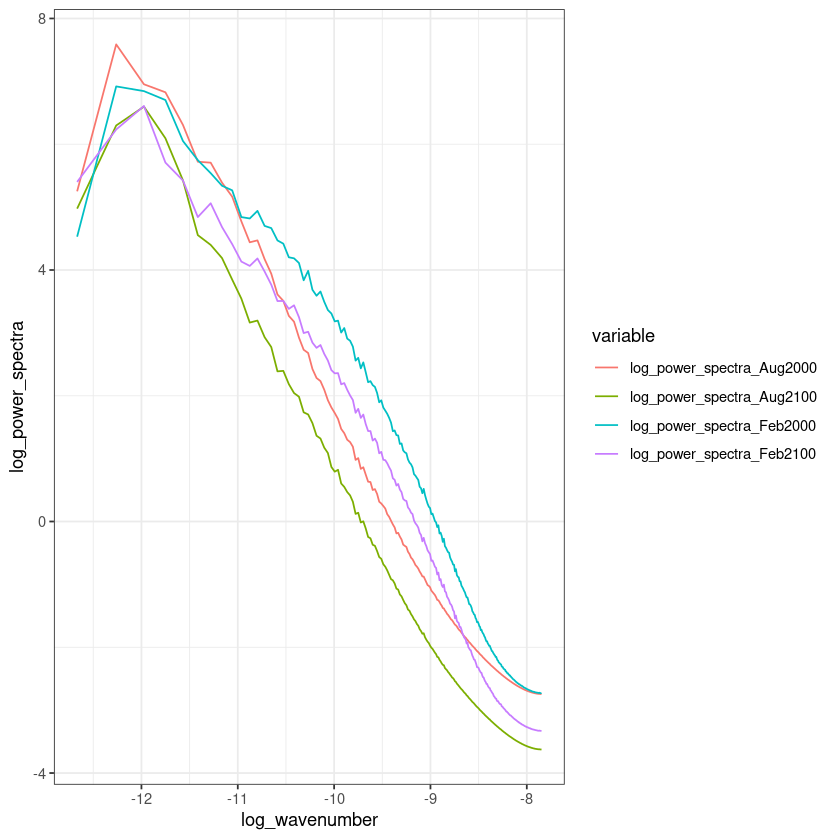

In [4]:
example(wavenumber_spectra)

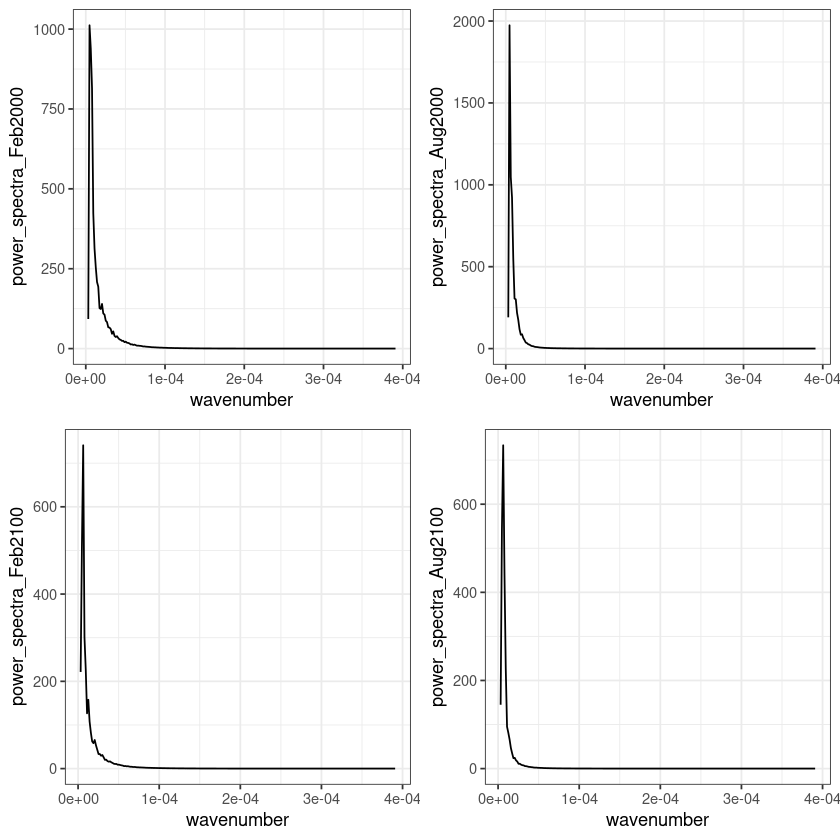

In [5]:
p.feb.2000 <- ggplot(wavenumber_spectra,aes(x=wavenumber,y=power_spectra_Feb2000)) + geom_line() + theme_bw()
p.aug.2000 <- ggplot(wavenumber_spectra,aes(x=wavenumber,y=power_spectra_Aug2000)) + geom_line() + theme_bw()
p.feb.2100 <- ggplot(wavenumber_spectra,aes(x=wavenumber,y=power_spectra_Feb2100)) + geom_line() + theme_bw()
p.aug.2100 <- ggplot(wavenumber_spectra,aes(x=wavenumber,y=power_spectra_Aug2100)) + geom_line() + theme_bw()
grid.arrange(p.feb.2000,p.aug.2000,p.feb.2100,p.aug.2100 ,nrow = 2,ncol=2)

In [6]:
data <-  wavenumber_spectra %>%  mutate_all(log) %>% rename_all( ~ paste0("log_", .x))
data <- data[4:140,]
head(data)

,log_wavenumber,log_power_spectra_Feb2000,log_power_spectra_Aug2000,log_power_spectra_Feb2100,log_power_spectra_Aug2100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,-11.75120,6.702832,6.825949,5.707974,6.094878
5,-11.56887,6.050134,6.306129,5.422436,5.424421
6,-11.41471,5.746714,5.721950,4.841743,4.554140
7,-11.28118,5.539694,5.706712,5.060948,4.398835
8,-11.16340,5.339459,5.388204,4.681946,4.189155
9,-11.05804,5.266620,5.166156,4.411379,3.847079


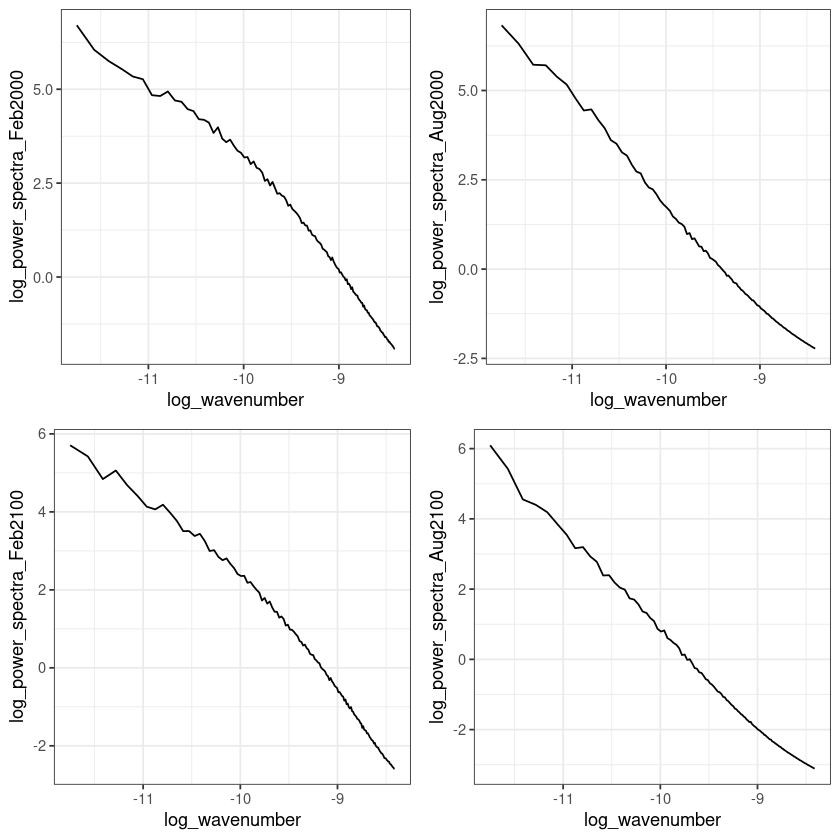

In [7]:
p.log.feb.2000 <- ggplot(data,aes(x=log_wavenumber,y=log_power_spectra_Feb2000)) + geom_line() + theme_bw()
p.log.aug.2000 <- ggplot(data,aes(x=log_wavenumber,y=log_power_spectra_Aug2000)) + geom_line() + theme_bw()
p.log.feb.2100 <- ggplot(data,aes(x=log_wavenumber,y=log_power_spectra_Feb2100)) + geom_line() + theme_bw()
p.log.aug.2100 <- ggplot(data,aes(x=log_wavenumber,y=log_power_spectra_Aug2100)) + geom_line() + theme_bw()
grid.arrange(p.log.feb.2000,p.log.aug.2000,p.log.feb.2100,p.log.aug.2100 ,nrow = 2,ncol=2)

In [8]:
est.sd <- . %>% diff %>% .^2 %>%  mean %>% sqrt
cpop.wavenumber <- . %>% cpop(y = .,
                              x = data$log_wavenumber,
                              beta = 2*log(length(.)),
                              sd = est.sd(.)) 

x0,y0,x1,y1,gradient,intercept,RSS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-11.751195,6.445875,-10.141745,3.645090,-1.740212,-14.00370,0.28615012
-10.141745,3.645090,-9.409389,1.625074,-2.758245,-24.32832,0.07954205
-9.409389,1.625074,-8.411888,-1.941655,-3.575663,-32.01973,0.08819012


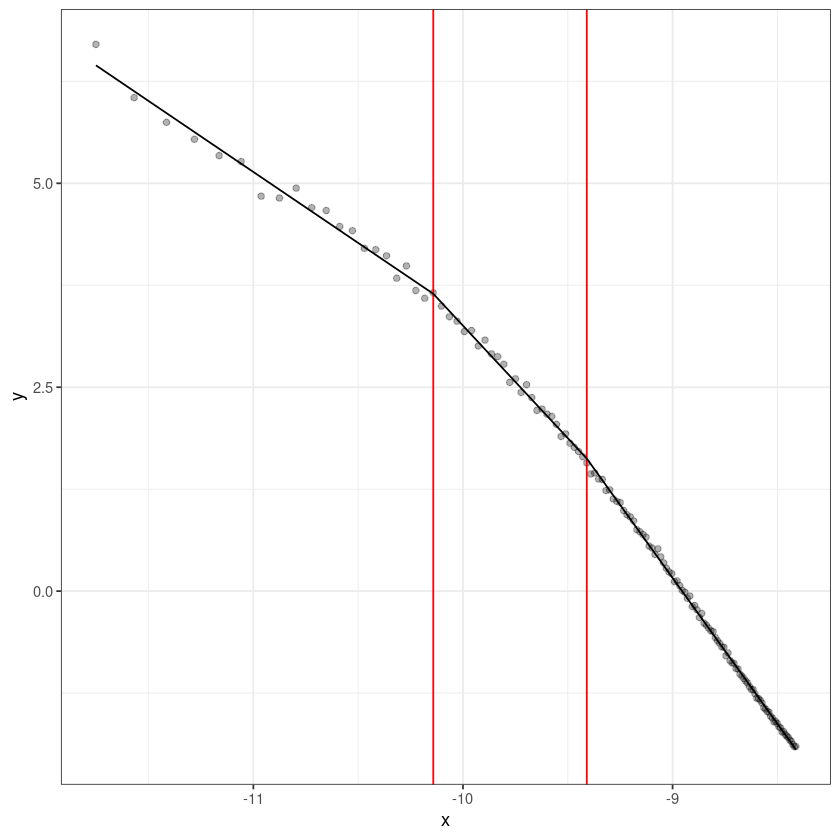

In [9]:
res_Feb2000  <- data$log_power_spectra_Feb2000 %>% cpop.wavenumber
res_Feb2000  %>% plot
res_Feb2000  %>% fitted

x0,y0,x1,y1,gradient,intercept,RSS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-11.751195,6.780909,-10.795671,4.378725,-2.513997,-22.76156,0.10291287
-10.795671,4.378725,-9.777102,1.011126,-3.306204,-31.31396,0.05259792
-9.777102,1.011126,-8.929834,-1.273390,-2.696334,-25.35120,0.03651479
-8.929834,-1.273390,-8.411888,-2.255237,-1.895653,-18.20126,0.01611237


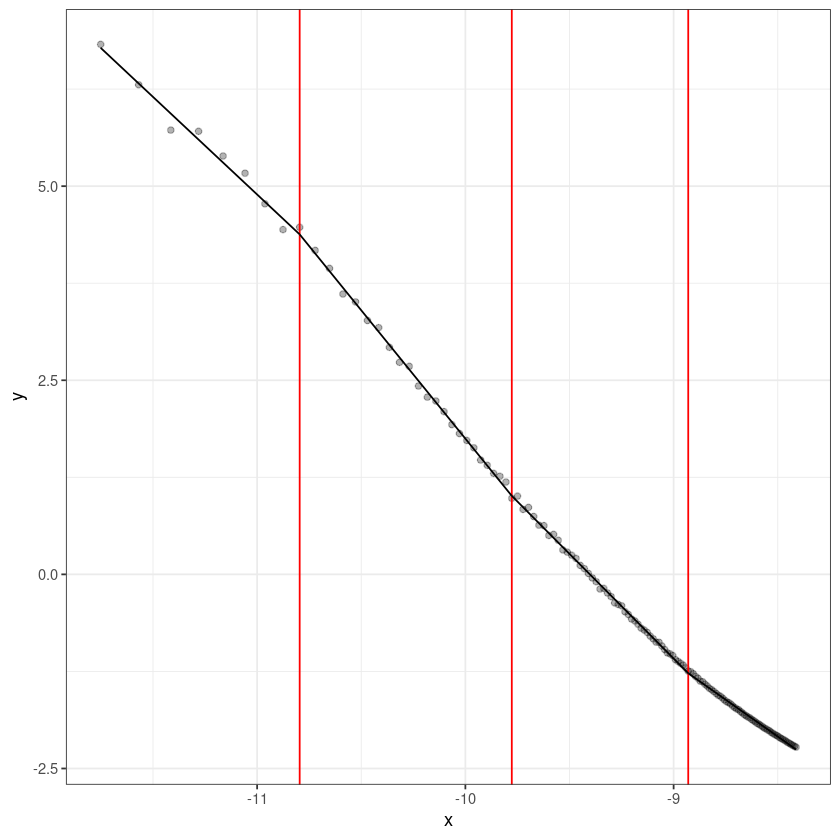

In [10]:
res_Aug2000  <- data$log_power_spectra_Aug2000 %>% cpop.wavenumber
res_Aug2000  %>% plot
res_Aug2000  %>% fitted

x0,y0,x1,y1,gradient,intercept,RSS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-11.75120,5.7191960,-10.102524,2.7101602,-1.825128,-15.72824,0.26733689
-10.10252,2.7101602,-9.317580,0.5454379,-2.757806,-25.15064,0.07771875
-9.31758,0.5454379,-8.411888,-2.6470886,-3.524955,-32.29862,0.07047822


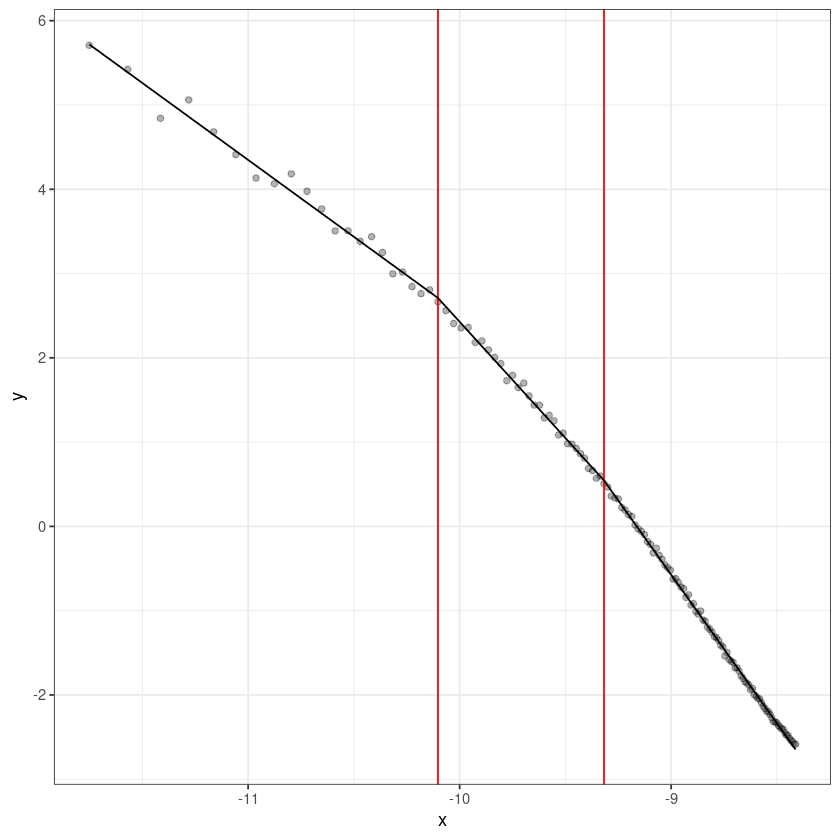

In [11]:
res_Feb2100  <- data$log_power_spectra_Feb2100 %>% cpop.wavenumber
res_Feb2100  %>% plot
res_Feb2100  %>% fitted

x0,y0,x1,y1,gradient,intercept,RSS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-11.751195,5.856488,-9.003895,-2.025475,-2.868985,-27.85752,0.36897154
-9.003895,-2.025475,-8.411888,-3.147893,-1.895951,-19.09642,0.02948851


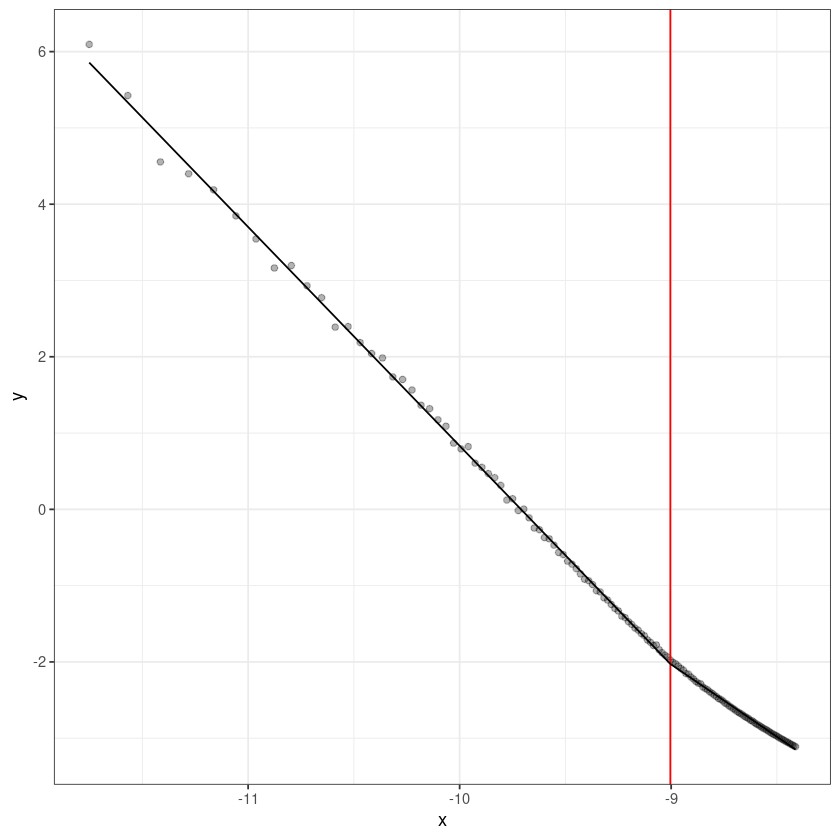

In [12]:
res_Aug2100 <- data$log_power_spectra_Aug2100 %>% cpop.wavenumber 
res_Aug2100 %>% plot
res_Aug2100  %>% fitted

In [13]:
re.est.sd <- . %>% residuals %>% .^2 %>% mean %>% sqrt
cpop.recalc <- . %>% {cpop(y = .@y,
                           x = .@x,
                           beta = 2*log(length(.@y)),
                           sd = re.est.sd(.),
                           minseglen=0.2)} 

[1] 54.39504

[1] 0.01307448

[1] 124.6294

[1] 0.003313009

[1] 186.1998

[1] 0.00182408

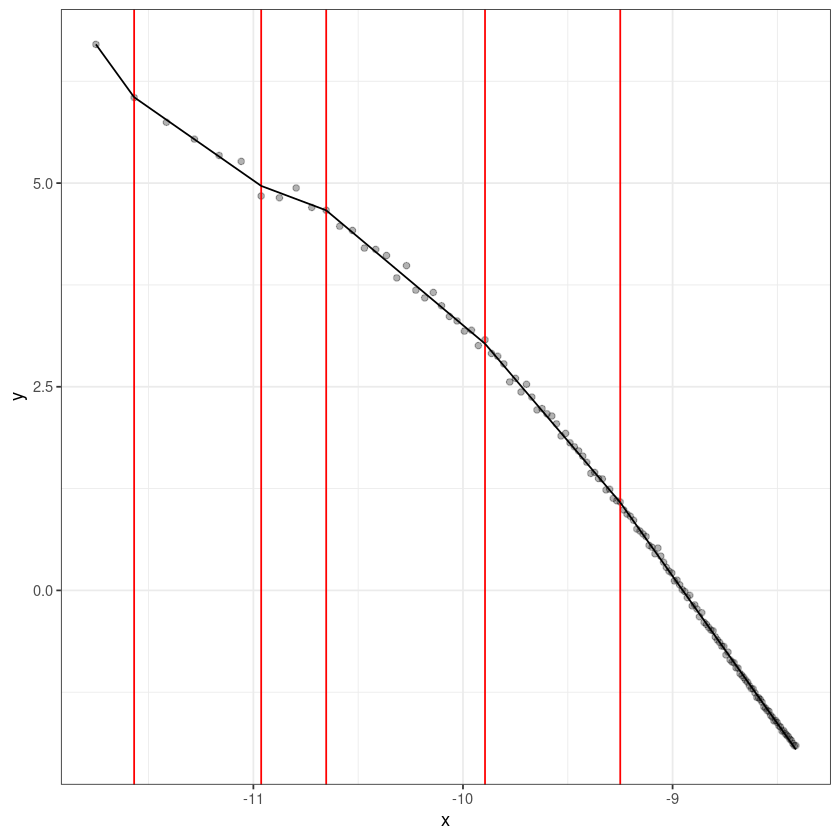

In [14]:
res <- res_Feb2000
res %>% cost
res@sd[1]^2
res %<>% cpop.recalc
res %>% cost
res@sd[1]^2
res %<>% cpop.recalc
res %>% cost
res@sd[1]^2
res %>% plot

[1] 54.02057

[1] 151.8343

[1] 166.5199

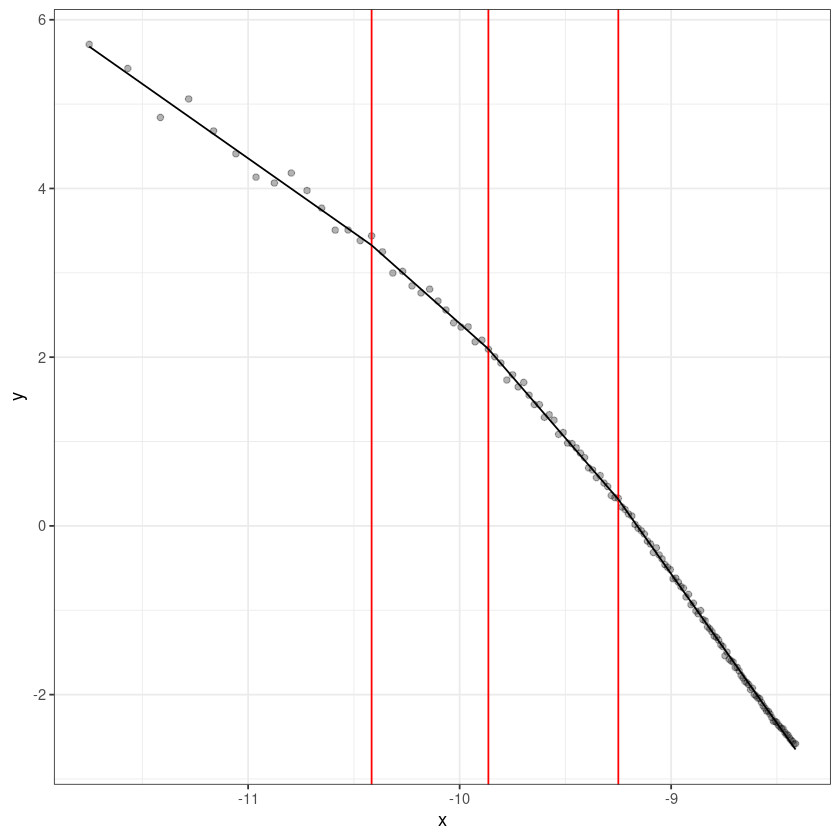

In [15]:
res <- res_Feb2100
res %>% cost
res %<>% cpop.recalc
res %>% cost
res %<>% cpop.recalc
res %>% cost
res %>% plot

[1] 44.32786

[1] 143.6985

[1] 196.0398

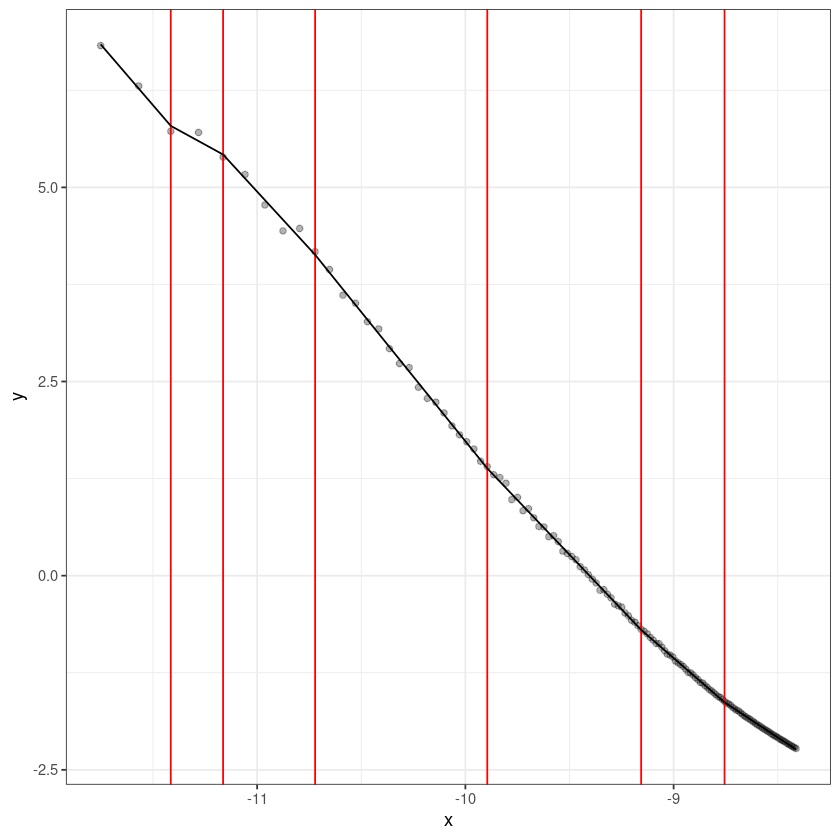

In [16]:
res <- res_Aug2000
res %>% cost
res %<>% cpop.recalc
res %>% cost
res %<>% cpop.recalc
res %>% cost
res %>% plot

[1] 32.04459

[1] 101.7141

[1] 165.0432

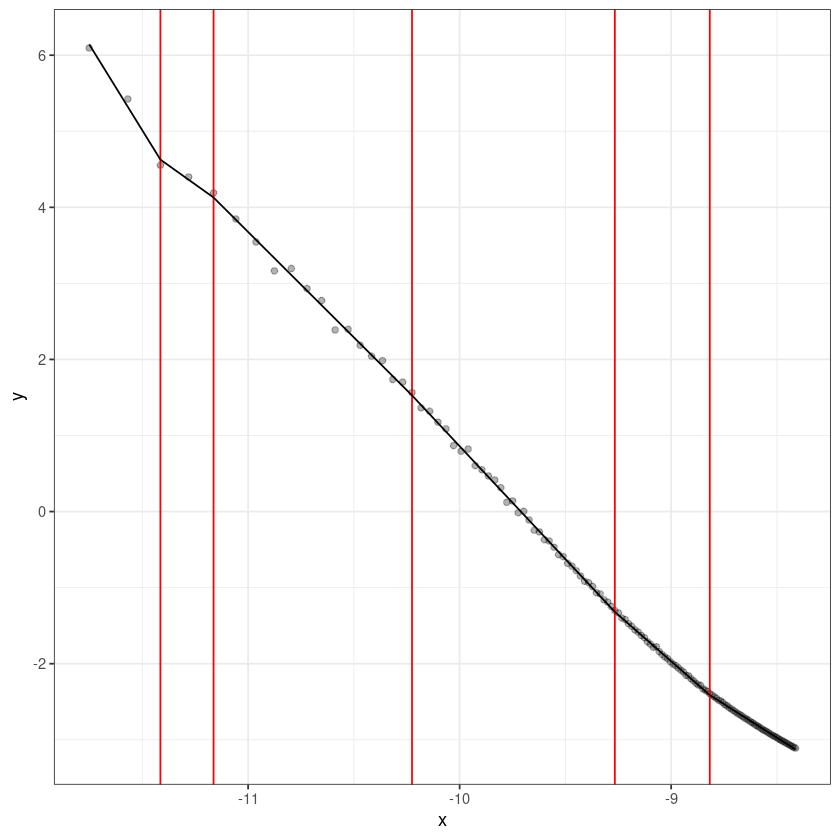

In [17]:
res <- res_Aug2100
res %>% cost
res %<>% cpop.recalc
res %>% cost
res %<>% cpop.recalc
res %>% cost
res %>% plot


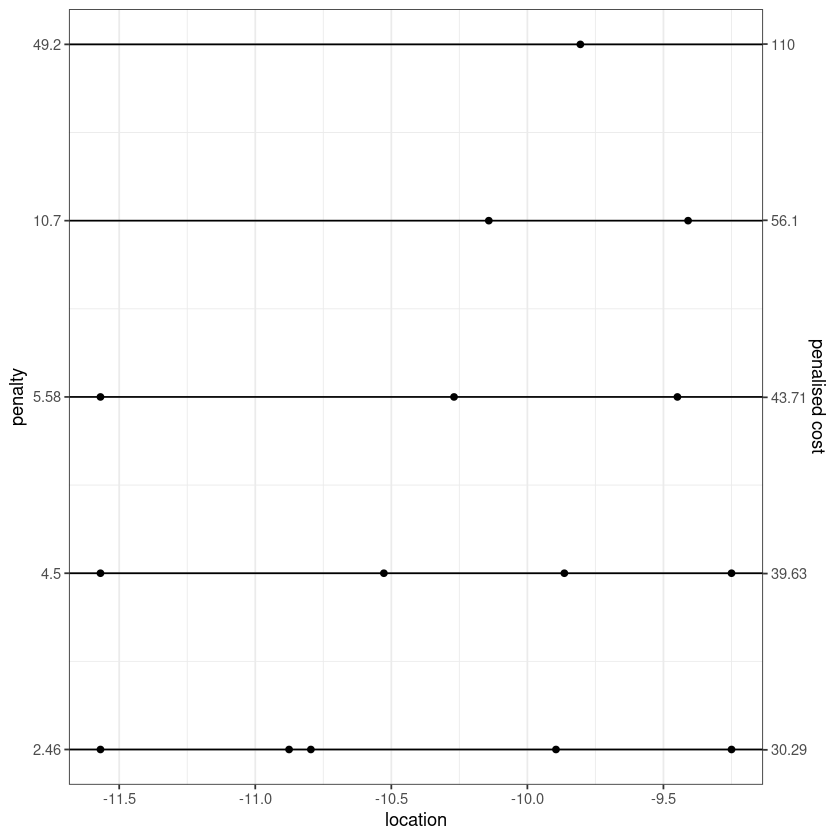

In [18]:
est.sd <- . %>% diff %>% .^2 %>%  mean %>% sqrt
cpop.crops.wavenumber <- . %>% cpop.crops(y = .,
                              x = data$log_wavenumber,
                              beta_min = 0.5*log(length(.)),
                              beta_max = 10*log(length(.)),      
                              sd = est.sd(.))
data$log_power_spectra_Feb2000 %>% cpop.crops.wavenumber %>% plot

In [19]:
cpop.crops.recalc <- . %>% {cpop.crops(y = .@y,
                                       x = .@x,
                                       beta_min = 0.5*log(length(.@y)),
                                       beta_max = 10*log(length(.@y)),   
                                       sd = re.est.sd(.))} 

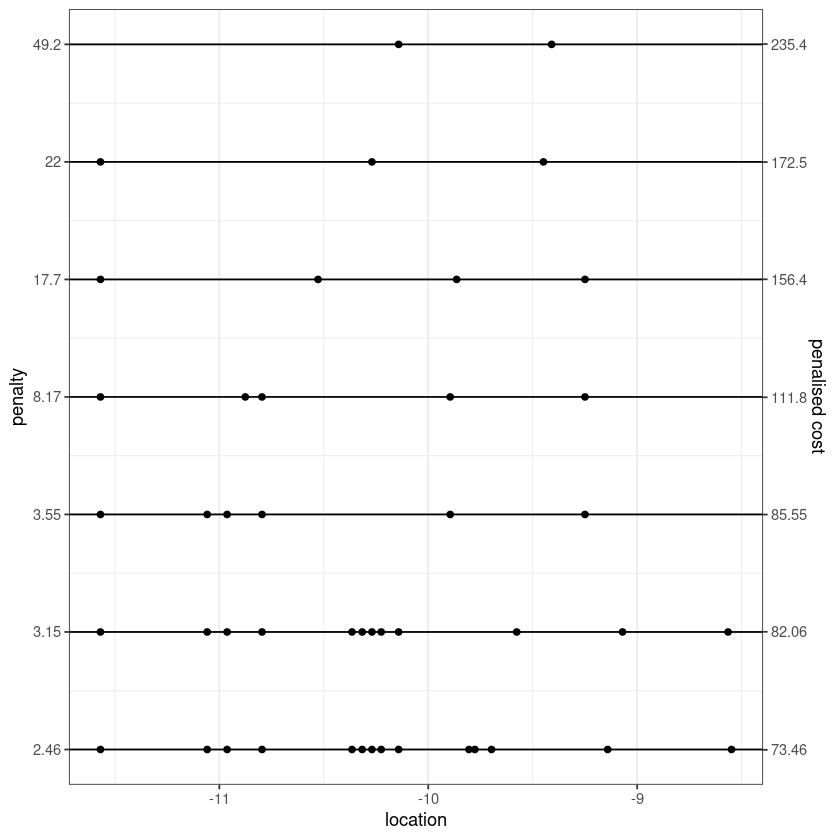

In [20]:
data$log_power_spectra_Feb2000 %>%
cpop.wavenumber %>%  
cpop.crops.recalc %>%
plot

In [21]:
data$log_power_spectra_Aug2100 %>% length
2*log(247)

[1] 137

[1] 11.01878

In [22]:
head(data$log_wavenumber)

[1] -11.75120 -11.56887 -11.41471 -11.28118 -11.16340 -11.05804

In [23]:
fitted=estimate(out1,x) ##fitted values at x
residuals=y1-fitted[,2]
out1=cpop(y1,x,beta=2*log(length(y1)),sd=sqrt(mean(residuals^2)),minseglen=0.2)
plot(out1)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'estimate': object 'out1' not found
